In [127]:
import json
import pprint
import pandas as pd

import numpy as np  
import matplotlib.pyplot as plt  

In [128]:
FILENAME_RAG = 'deepeval-cache-rag-no-assessment.json'
FILENAME_ZEROSHOT = 'deepeval-cache-zeroshot-no-assessment.json'

In [129]:
json_data = None
with open(FILENAME_RAG, 'r') as f:
    data = f.read()
    json_data = json.loads(data)

dd = pd.read_json(FILENAME_RAG).reset_index()
aa = pd.json_normalize(dd['test_cases_lookup_map'])
aa = pd.json_normalize(pd.json_normalize(aa['cached_metrics_data'])[0])
aa['index'] = dd['index']
aa.columns = [c.replace('metric_metadata.', '') for c in aa.columns]
aa.columns = [c.replace('metric_configuration.', '') for c in aa.columns]
aa.to_csv(FILENAME_RAG.replace('.json', '.csv'), index=False)
rag_df = aa.copy()
rag_df

,metric,threshold,success,score,reason,strictMode,evaluationModel,evaluationCost,threshold,evaluation_model,strict_mode,include_reason,index
0,Answer Relevancy,0.7,True,1.000000,The score is 1.00 because the response directl...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
1,Answer Relevancy,0.7,False,0.600000,The score is 0.60 because the irrelevant state...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
2,Answer Relevancy,0.7,False,0.666667,The score is 0.67 because the statements about...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
3,Answer Relevancy,0.7,False,0.000000,The score is 0.00 because the irrelevant state...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
4,Answer Relevancy,0.7,False,0.400000,The score is 0.40 because the statements about...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
5,Answer Relevancy,0.7,True,1.000000,The score is 1.00 because the response provide...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
6,Answer Relevancy,0.7,False,0.636364,The score is 0.64 because the statements provi...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
7,Answer Relevancy,0.7,False,0.500000,The score is 0.50 because of the irrelevant st...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
8,Answer Relevancy,0.7,True,1.000000,The score is 1.00 because the response provide...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
9,Answer Relevancy,0.7,False,0.500000,The score is 0.50 because the statement mentio...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."


In [130]:
json_data = None
with open(FILENAME_ZEROSHOT, 'r') as f:
    data = f.read()
    json_data = json.loads(data)

dd = pd.read_json(FILENAME_ZEROSHOT).reset_index()
aa = pd.json_normalize(dd['test_cases_lookup_map'])
aa = pd.json_normalize(pd.json_normalize(aa['cached_metrics_data'])[0])
aa['index'] = dd['index']
aa.columns = [c.replace('metric_metadata.', '') for c in aa.columns]
aa.columns = [c.replace('metric_configuration.', '') for c in aa.columns]
aa.to_csv(FILENAME_ZEROSHOT.replace('.json', '.csv'), index=False)
zeroshot_df = aa.copy()
zeroshot_df

,metric,threshold,success,score,reason,strictMode,evaluationModel,evaluationCost,threshold,evaluation_model,strict_mode,include_reason,index
0,Answer Relevancy,0.7,False,0.583333,The score is 0.58 because the irrelevant state...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
1,Answer Relevancy,0.7,True,0.916667,The score is 0.92 because the statement about ...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
2,Answer Relevancy,0.7,False,0.000000,The score is 0.00 because the irrelevant state...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
3,Answer Relevancy,0.7,True,1.000000,The score is 1.00 because the response directl...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
4,Answer Relevancy,0.7,False,0.615385,The score is 0.62 because the irrelevant state...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
5,Answer Relevancy,0.7,False,0.684211,The score is 0.68 because the statements about...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
6,Answer Relevancy,0.7,True,1.000000,The score is 1.00 because the response address...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
7,Answer Relevancy,0.7,False,0.555556,The score is 0.56 because the irrelevant state...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
8,Answer Relevancy,0.7,True,0.700000,The score is 0.70 because the statements provi...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."
9,Answer Relevancy,0.7,True,0.833333,The score is 0.83 because the statement about ...,False,gpt-3.5-turbo,0,0.7,gpt-3.5-turbo,False,True,"{""actual_output"": ""Architecture Decision Recor..."


In [131]:
rag_df = pd.read_csv('deepeval-cache-rag-no-assessment.csv')
zeroshot_df = pd.read_csv('deepeval-cache-zeroshot-no-assessment.csv')

In [132]:
rag_df.rename({'score': 'rag'}, axis=1, inplace=True)
zeroshot_df.rename({'score': 'zeroshot'}, axis=1, inplace=True)
answer_relevance_df = pd.concat([rag_df['rag'], zeroshot_df['zeroshot']], axis=1)
answer_relevance_df

,rag,zeroshot
0,1.000000,0.583333
1,0.600000,0.916667
2,0.666667,0.000000
3,0.000000,1.000000
4,0.400000,0.615385
5,1.000000,0.684211
6,0.636364,1.000000
7,0.500000,0.555556
8,1.000000,0.700000
9,0.500000,0.833333


In [133]:
def plot_answer_relevance(df, title=""):
    X = ['ADR'+str(i+1) for i in range(0,df.shape[0])] 
    rag = df['rag']
    zeroshot = df['zeroshot']
    X_axis = np.arange(len(X)) 

    plt.figure(figsize=(10,3))
    plt.bar(X_axis - 0.2, rag, 0.4, label = 'RAG',color='#005b96') 
    plt.bar(X_axis + 0.2, zeroshot, 0.4, label = 'ZeroShot',color='#b3cde0')
    plt.axhline(y=0.7, color='gray', linestyle='--')
    plt.xticks(X_axis, X, rotation=45) 
    plt.xlabel("") 
    plt.ylabel("Score") 
    plt.title(title) 
    plt.legend() 
    plt.show() 

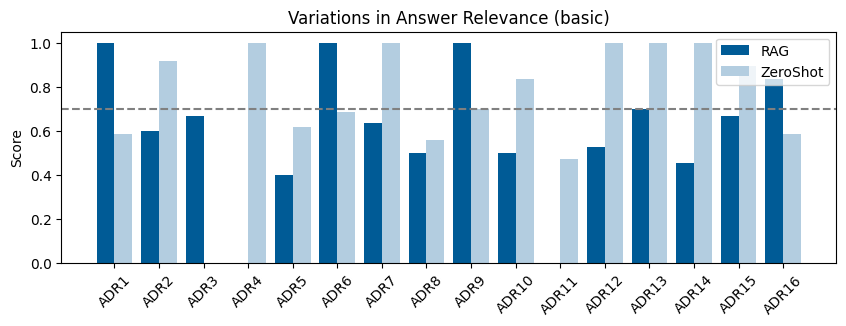

In [134]:
plot_answer_relevance(answer_relevance_df, title="Variations in Answer Relevance (basic)")

In [135]:
rag_df = pd.read_csv('deepeval-cache-rag-ranking__results.csv')
rag_df.columns = [c.replace('metric_metadata.', '') for c in rag_df.columns]
rag_df.columns = [c.replace('metric_configuration.', '') for c in rag_df.columns]
zeroshot_df = pd.read_csv('deepeval-cache-zeroshot-ranking__results.csv')
zeroshot_df.columns = [c.replace('metric_metadata.', '') for c in zeroshot_df.columns]
zeroshot_df.columns = [c.replace('metric_configuration.', '') for c in zeroshot_df.columns]
rag_df.rename({'score': 'rag'}, axis=1, inplace=True)
zeroshot_df.rename({'score': 'zeroshot'}, axis=1, inplace=True)
answer_relevance_df = pd.concat([rag_df['rag'], zeroshot_df['zeroshot']], axis=1)
answer_relevance_df

,rag,zeroshot
0,0.370370,1.000000
1,0.277778,1.000000
2,0.826087,0.900000
3,0.687500,0.277778
4,0.916667,1.000000
5,0.000000,1.000000
6,0.500000,1.000000
7,0.888889,0.384615
8,0.363636,0.636364
9,0.807692,0.541667


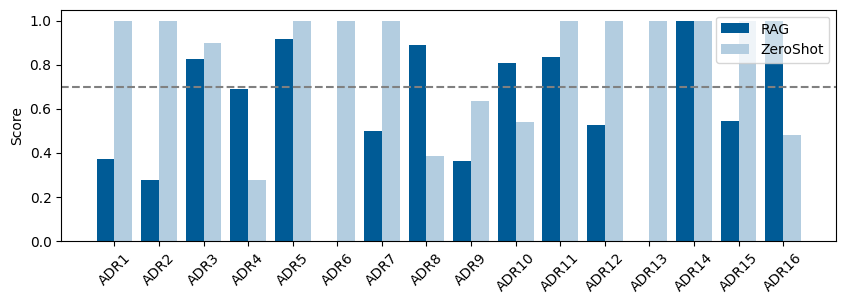

In [136]:
# plot_answer_relevance(answer_relevance_df, title="Variations in Answer Relevance (rankings + assessments)")
plot_answer_relevance(answer_relevance_df)

In [137]:
rag_df = pd.read_csv('deepeval-cache-rag-assessment__results.csv')
rag_df.columns = [c.replace('metric_metadata.', '') for c in rag_df.columns]
rag_df.columns = [c.replace('metric_configuration.', '') for c in rag_df.columns]
zeroshot_df = pd.read_csv('deepeval-cache-zeroshot-assessment__results.csv')
zeroshot_df.columns = [c.replace('metric_metadata.', '') for c in zeroshot_df.columns]
zeroshot_df.columns = [c.replace('metric_configuration.', '') for c in zeroshot_df.columns]
rag_df.rename({'score': 'rag'}, axis=1, inplace=True)
zeroshot_df.rename({'score': 'zeroshot'}, axis=1, inplace=True)
answer_relevance_df = pd.concat([rag_df['rag'], zeroshot_df['zeroshot']], axis=1)
answer_relevance_df

,rag,zeroshot
0,0.000000,1.000000
1,0.500000,0.555556
2,0.461538,0.625000
3,1.000000,1.000000
4,0.600000,1.000000
5,0.470588,0.769231
6,1.000000,0.583333
7,0.000000,0.384615
8,0.000000,0.000000
9,0.363636,0.555556


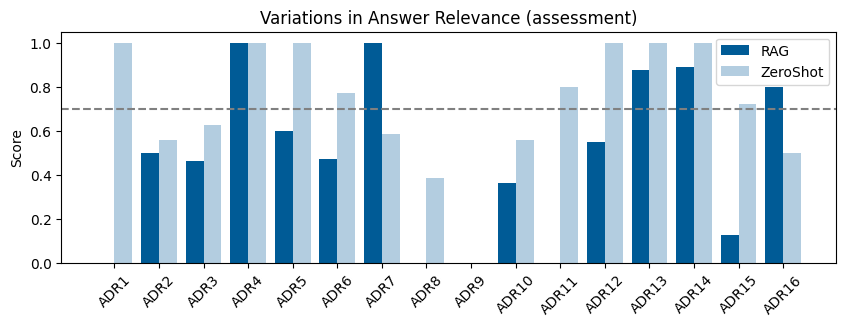

In [138]:
plot_answer_relevance(answer_relevance_df, title="Variations in Answer Relevance (assessment)")